In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy
import datetime as dt
from scipy.stats import norm

from tqdm.auto import tqdm

plt.figure(figsize=(10,10))
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(15,5)}
        )

<Figure size 720x720 with 0 Axes>

In [2]:
#прочитаем данные 
df=pd.read_csv('~/shared/problem2.csv', sep=";")
df

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


***

Рассмотрим основную статустику dataframe

***

In [3]:
df.describe()

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


In [4]:
#посчитаем число уникальных user_id
df.user_id.nunique()

404770

***

Число уникальных user_id совпадает с числом user_id в датафрейме, значит в данных только уникальные пользователи (нет повторений)

***

In [5]:
df.query('revenue<0')

,user_id,revenue,testgroup


***

Данных с выручкой меньше нуля нет.

Посмотрим на количество данных, где выручка больше нуля в конторольной группе А и в тестовой группе Б.

In [6]:
fig = px.histogram(df.query('revenue>0'), x='testgroup')
fig.show()

***

Рассмотрим распределение выручки во всём датасете.

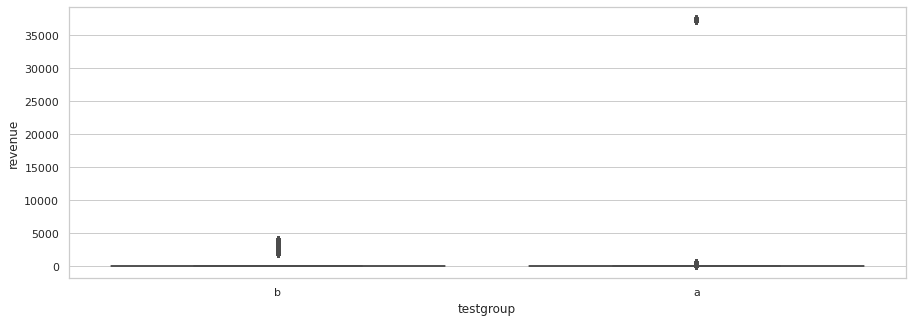

In [7]:
sns.boxplot(x = 'testgroup', y = 'revenue', data=df)

Видим что в группе А больше данных и присутвуют выбросы. Рассмотрим группу А и выбросы подробнее.

***

Выделим группу А в отдельный dataframe и построим график, где выручка больше нуля.

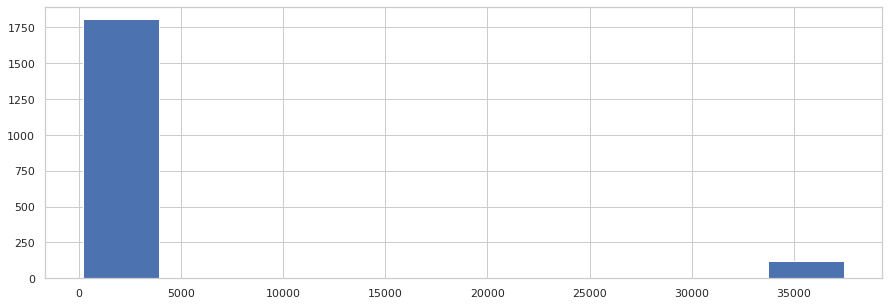

In [8]:
group_a=df.query('testgroup=="a" and revenue > 0')
group_a.revenue.hist()

***

Видим, что есть небольшая часть данных превышающих 30000.
Посчитаем сколько данных в диапазоне больше 30000

In [95]:
group_a.query('revenue > 30000').agg({'user_id':'nunique'})

user_id    123
dtype: int64

In [96]:
group_a.query('revenue > 30000').agg({'user_id':'count'})

user_id    123
dtype: int64

***

Посчитаем сколько данных в диапазоне меньше 5000

***

In [97]:
group_a.query('revenue < 5000').agg({'user_id':'nunique'})

user_id    1805
dtype: int64

***

Нарисуем график распределения значений выручки в диапазоне больше 30000

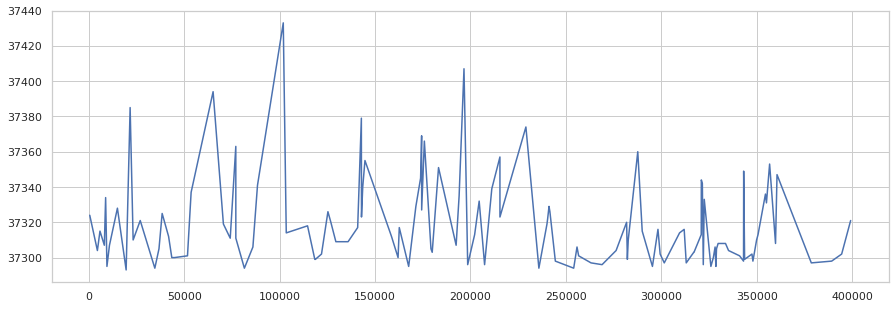

In [98]:
group_a.query('revenue > 30000').revenue.plot()

Можно сделать вывод что привутсвуют выбросы в группе А. Как видно из графика в основном выручка распределена в диапазоне 0-5000, однако 123 из 1805 показаний превышают 30000. 
Среди этих 123 показаний нет повторяющихся user_id и данные выручки различные (не повторяются).

***

Рассмотрим количество данных с выручкой больше нуля в группе Б.

In [99]:
group_b=df.query('testgroup=="b" and revenue > 0')
group_b.agg({'user_id':'nunique'})

user_id    1805
dtype: int64

***

Исключим выбросы из группы А (значения первышающие 30000) и посчитаем количество данных с выручкой больше нуля.

In [100]:
group_a_corrected=df.query('testgroup=="a" and 30000 > revenue > 0')
group_a_corrected.agg({'user_id':'nunique'})

user_id    1805
dtype: int64

***

Количество данных в группе А и Б совпадают, если исключить выбросы из группы А. Возможно сторонние\некорректные\лишние данные были добавлены в группу А по ошибке.
Продолжим исследование с исключёнными выбросами. 

***

In [101]:
df_corrected=df.query('revenue<30000')
df_corrected

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


***

Рассмотрим графики распределения выручки в группе А и Б

***

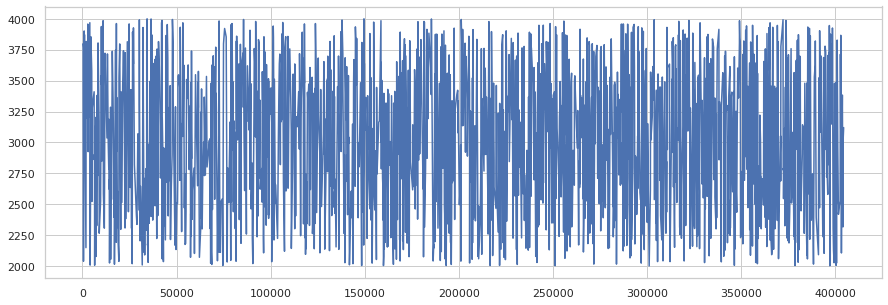

In [102]:
plt.plot(group_b['revenue'])

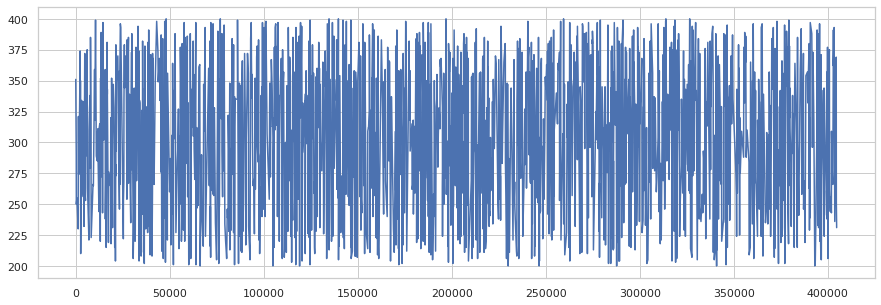

In [103]:
plt.plot(group_a_corrected['revenue'])

In [104]:
print('Средняя выручка в группе А:', group_a_corrected.revenue.mean().round())
print('Медианная выручка в группе А:', group_a_corrected.revenue.median())

Средняя выручка в группе А: 302.0
Медианная выручка в группе А: 305.0


In [105]:
print('Средняя выручка в группе Б:', group_b.revenue.mean().round())
print('Медианная выручка в группе Б:', group_b.revenue.median())

Средняя выручка в группе Б: 3004.0
Медианная выручка в группе Б: 3022.0


Видно что среднее и медиана группы Б отличается группы А в 10 раз.

***

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



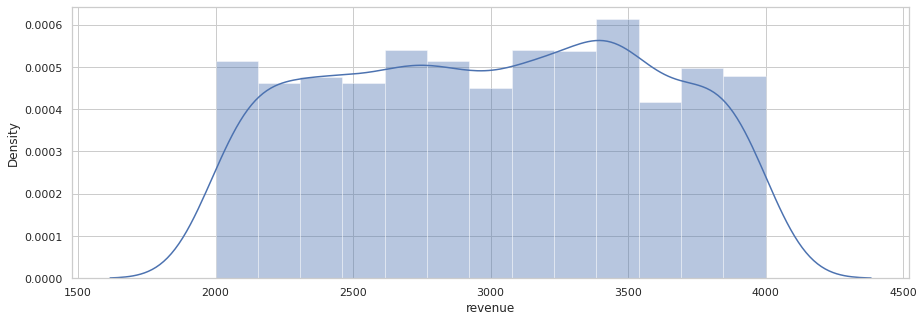

In [106]:
sns.distplot(group_b['revenue'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



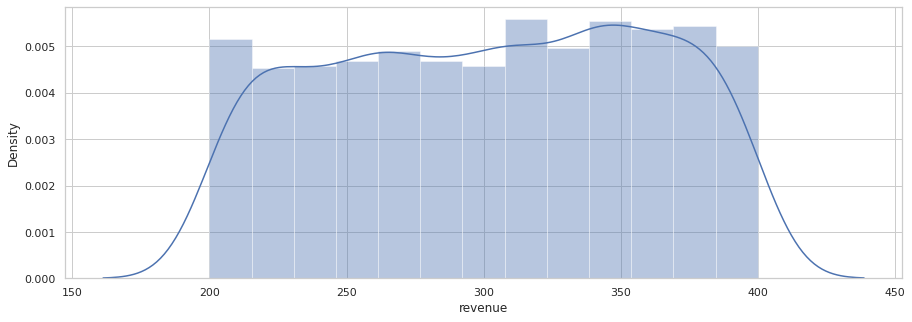

In [107]:
sns.distplot(group_a_corrected['revenue'])

Судя по графикам, распределение в обоих группах - однородное.

***

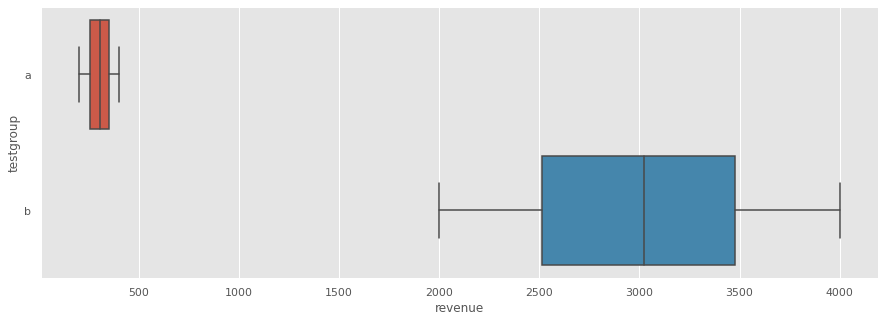

In [118]:
sns.boxplot(data=df_corrected.query('revenue>0'), x='revenue', y='testgroup')

По графику видно, что среднее значение выручки в группе Б значительно выше средней выручки в группе А.

***

Проведём тесты чтобы проверить гипотезу. Нулевая гипотеза - значимых различий между группой Б и группой А нет. Если гипотеза не подтверждается, значит группой Б и группой А значимо отличаются.

In [109]:
scipy.stats.mannwhitneyu(group_a_corrected['revenue'], group_b['revenue'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

Результаты U-теста Mann-Whitney:
    p-value<0.05 =>  откланяем нулевую гипотезу => значит различия между группой Б и группой А.
    
***

In [110]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {#"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

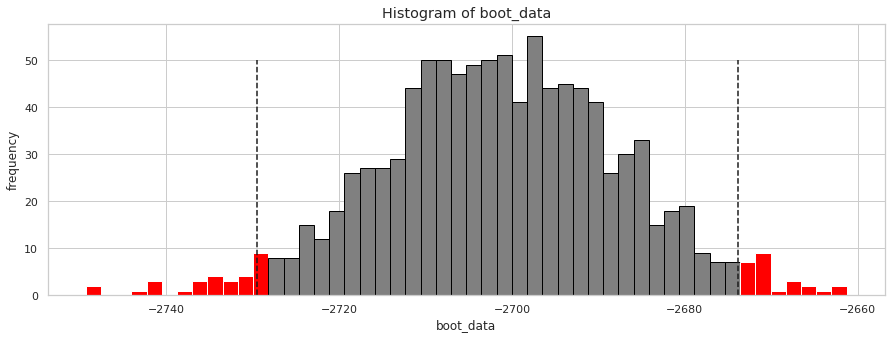

{'quants':                  0
 0.025 -2729.514848
 0.975 -2673.785471,
 'p_value': 0.0}

In [111]:
get_bootstrap(group_a_corrected['revenue'], group_b['revenue'])

***

Результат бутстрапа:
    p-value<0.05 и 0 не попал в доверительный интервал => откланяем нулевую гипотезу => 
    среднее в группе Б отличается от среднего в группе А.
    
***

In [112]:
#Посчитаем сумму и количество покупок в каждой группе
test_results_summary = df.query('revenue<30000').groupby(by=['testgroup'], as_index=False).agg({'revenue': ['count', 'sum']})
test_results_summary

testgroup revenue         
              count      sum
0         a  201980   545937
1         b  202667  5421603

***

Посчитаем ARPU и ARPPU для каждой группы.

In [113]:
test_results_summary['ARPU'] = (test_results_summary.revenue['sum']/test_results_summary.revenue['count'])
test_results_summary['ARPPU'] = round(test_results_summary.revenue['sum']/group_b.query('revenue != 0').revenue.count())
test_results_summary

testgroup revenue                ARPU   ARPPU
              count      sum                   
0         a  201980   545937   2.702926   302.0
1         b  202667  5421603  26.751287  3004.0

Из таблицы видно что выручка, ARPU (средний доход на одного пользователя) и ARPPU (cредняя выручка на одного платящего пользователя) значительно выше в группе Б по сравнению с группой А.

***

In [114]:
#посчитаем сколько всего пользователей
users=df_corrected.groupby(by=['testgroup'], as_index=False).agg({'user_id': 'count'})
users

,testgroup,user_id
0,a,201980
1,b,202667


In [115]:
#посчитаем сколько пользователей, которые произвели покупку
clients=df_corrected.query('revenue>0').groupby(by=['testgroup'], as_index=False).agg({'user_id': 'count'})
clients

,testgroup,user_id
0,a,1805
1,b,1805


In [120]:
#вычистлим процент платящих пользователей
clients['user_id']*100/users['user_id']

0    0.893653
1    0.890624
Name: user_id, dtype: float64

***

Итог:
    * В результате анализа данных, были обнаружены выбросы, вероятно случайно добавленные значения. При возможности хотелось бы по подробнее изучить эти данные и их верность.
    * При разборе результатов А/Б теста выбросы были исключены.
    * Были изучены целевые метрики: ARPU (средний доход на пользователя), ARPPU (средний доход на платящего пользователя), средняя и медиана выручки. А также отношение платящий пользователей, ко всем пользователям.
    * Результаты бутстрапа и других тестов, говорят о том что различия между группами присутвует и различие значимое.
    * Среднее и медиана группы Б отличается группы А в 10 раз, в пользу греппы Б.
    * При схожем проценте платящих пользователей, выручка в группе Б больше в 10 раз. 
    * Процент платящих пользователей в обоих группах практически одинаковый.
Стоит принять набор акционных предложений, который испытывали на группе Б и запустить для всех пользователей.